## R2 Score and Comparison of Regressors

- goodness of fit parameter, tried to minimize
- R2 score is given by **1 - (sum(res)/sum(avg))**
- sum(res) is given by **sum [(true-pred)^2]**
- sum(avg) is given by **sum [(avg-pred)^2]**
- for a normal model, this R2 score should be between 0 and 1, if it's in negative => broken model (opposite direction for the trend line)
- the score should be closer to 1

### Adjusted R2 Score
- **formula** => 1 - (1-R^2) * (n-1)/(n-p-1)
- **p** => number of regressors 
- **n** => sample size
- This is done in order to penalize the independent variables which are not important

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
from sklearn.metrics import r2_score

In [4]:
data=pd.read_csv('Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
X=data.iloc[:,1].values
Y=data.iloc[:,2].values

In [9]:
X=pd.DataFrame(X)

## Model Selection

### Check Linear/Non-Linear
- If Linear
    - single feature (Simple Linear Regression)
    - multiple features (Multiple Linear Regression)
- If Non-Linear
    - Polynomial Regression
    - Support Vector Regression
    - Decision Tree Regression
    - Random Forest Regression

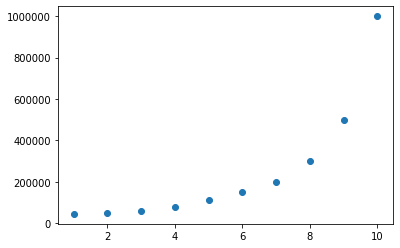

In [6]:
plt.scatter(X,Y)
plt.show()

### Comparing Regressors

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [10]:
linreg = LinearRegression()
linreg.fit(X, Y)
linreg_predict=linreg.predict(X)

In [11]:
polyreg = PolynomialFeatures(degree=5)
X_poly = polyreg.fit_transform(X)
linreg2 = LinearRegression()
linreg2.fit(X_poly, Y)
polyreg_predict = linreg2.predict(X_poly)

In [14]:
dectree=DecisionTreeRegressor()
dectree.fit(X,Y)
dectree_predict=dectree.predict(X)

In [15]:
randfor=RandomForestRegressor()
randfor.fit(X,Y)
randfor_predict=randfor.predict(X)

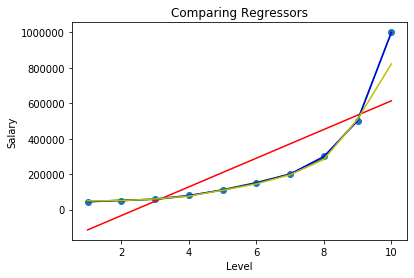

In [36]:
plt.scatter(X,Y)
plt.plot(X,linreg_predict,color='r')
plt.plot(X,polyreg_predict,color='g')
plt.plot(X,dectree_predict,color='b')
plt.plot(X,randfor_predict,color='y')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Comparing Regressors')
plt.show()

### Comparing R2 scores of Regressors

In [37]:
r2_score(Y,linreg_predict)

0.6690412331929895

In [38]:
r2_score(Y,polyreg_predict)

0.9997969027099755

In [39]:
r2_score(Y,dectree_predict)

1.0

In [40]:
r2_score(Y,randfor_predict)

0.95999533548841